In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("improved_preprocessed_dataset.csv")

In [3]:
df.describe()

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,R4-PM12:I,R4:F,R4:DF,R4-PA:Z,R4-PA:ZH,R4:S,relay1_log,relay2_log,relay3_log,relay4_log
count,4966.000000,4966.000000,4966.000000,4966.000000,4966.000000,4966.000000,4966.000000,4966.000000,4966.000000,4966.000000,...,4.966000e+03,4966.000000,4.966000e+03,4966.000000,4966.000000,4966.0,4966.0,4966.0,4966.0,4966.0
mean,-17.925492,131642.877159,8.610555,131381.627418,1.681621,131711.442402,-18.174249,403.779397,10.930328,403.804157,...,7.404327e+00,59.999358,1.000000e-02,10.330778,0.014666,2048.0,1.0,1.0,1.0,1.0
std,98.099812,1413.577106,115.044643,1416.152391,96.408966,1422.205311,97.374545,117.020229,111.679895,107.440501,...,1.199162e-13,0.001680,2.637045e-16,3.345532,0.097103,0.0,0.0,0.0,0.0,0.0
min,-179.988962,127622.944500,-179.994691,127322.064900,-179.960314,127622.944400,-179.988962,3.662200,-179.736860,7.507510,...,7.404327e+00,59.996000,1.000000e-02,0.267951,-0.283431,2048.0,1.0,1.0,1.0,1.0
25%,-97.404258,131007.835800,-99.085889,130706.956500,-77.405166,131064.250625,-97.626279,331.474877,-90.269501,336.006850,...,7.404327e+00,59.999000,1.000000e-02,8.257677,-0.025894,2048.0,1.0,1.0,1.0,1.0
50%,-35.864293,131634.667500,17.077007,131333.788300,14.080438,131684.814000,-33.369062,393.869610,10.930328,395.517600,...,7.404327e+00,60.000000,1.000000e-02,9.733030,0.021392,2048.0,1.0,1.0,1.0,1.0
75%,71.277382,132136.132900,116.783123,131835.253700,77.995312,132211.352700,67.545994,464.321183,115.522615,469.127820,...,7.404327e+00,60.000000,1.000000e-02,11.885319,0.059952,2048.0,1.0,1.0,1.0,1.0
max,179.994691,135521.024200,179.971773,135220.145300,179.966044,135652.658925,179.925936,862.860098,179.988962,868.490730,...,7.404327e+00,60.003000,1.000000e-02,22.768245,0.317489,2048.0,1.0,1.0,1.0,1.0


In [24]:
x = df[[
    "R2-PA1:VH", "R2-PM1:V", "R2-PA2:VH", "R2-PM2:V",
    "R2-PA3:VH", "R2-PM3:V", "R2-PA4:IH", "R2-PM4:I",
    "R2-PA5:IH", "R2-PM5:I", "R2-PA6:IH", "R2-PM6:I",
    "R2-PA7:VH", "R2-PM7:V", "R2-PA8:VH", "R2-PM8:V",
    "R2-PA9:VH", "R2-PM9:V", "R2-PA10:IH", "R2-PM10:I",
    "R2-PA11:IH", "R2-PM11:I", "R2-PA12:IH", "R2-PM12:I",
    "R2:F", "R2:DF", "R2-PA:Z", "R2-PA:ZH", "R2:S"
]]
y = df[["marker"]]

KeyError: "['R2:S'] not in index"

In [ ]:
x

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
x_train.shape,x_test.shape

In [25]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std=scaler.transform(x_test)

In [26]:
#%% Apply SMOTE to oversample the minority class for both train and test sets
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x_train_std, y_train)
X_resampled_test, y_resampled_test = smote.fit_resample(x_test_std, y_test)

C:\Users\durga\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\durga\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


ValueError: Found input variables with inconsistent numbers of samples: [3724, 5850]

In [ ]:
#random forest
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_resampled, y_resampled)
# Evaluate the model
y_pred = model.predict(X_resampled_test)
print(classification_report(y_resampled_test, y_pred))
print(confusion_matrix(y_resampled_test, y_pred))
# Compute confusion matrix using the true and predicted labels
cm = confusion_matrix(y_resampled_test,y_pred)
from sklearn.metrics import accuracy_score
print("ACCURACY SCORE",accuracy_score(y_resampled_test,y_pred))
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest Classifier after SMOTE')
plt.tight_layout()
plt.show()



Training Random Forest...
Confusion Matrix for Random Forest:
[[907  34]
 [ 57 884]]


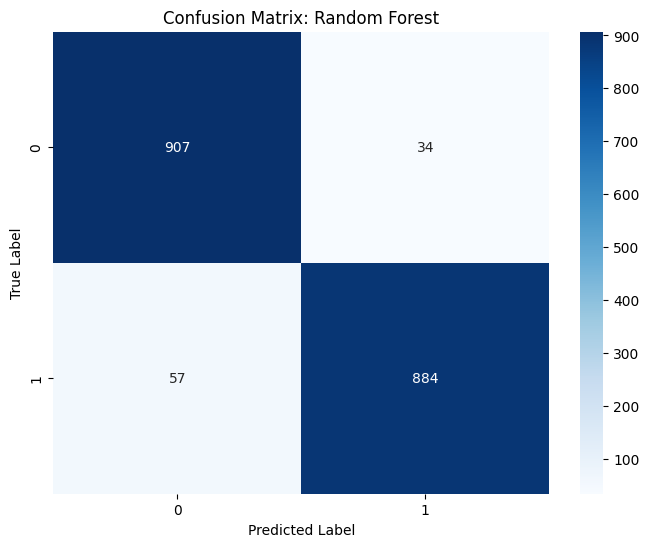


Training SVM...
Confusion Matrix for SVM:
[[479 462]
 [193 748]]


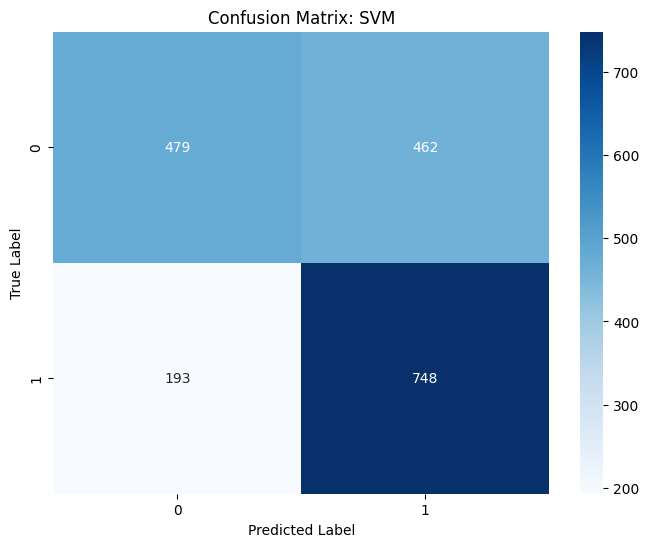


Training Decision Tree...
Confusion Matrix for Decision Tree:
[[870  71]
 [121 820]]


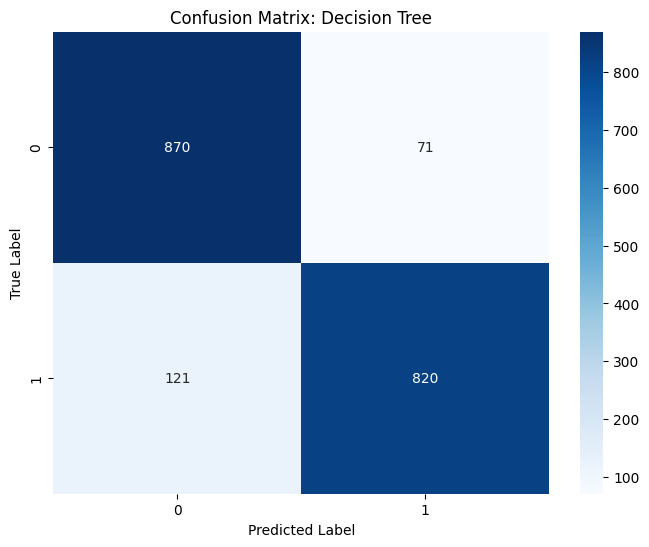

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define classifiers
all_clf = [
    RandomForestClassifier(n_estimators=100, random_state=42),
    SVC(kernel='linear', random_state=42),
    DecisionTreeClassifier(random_state=42)
]

clf_labels = ["Random Forest", "SVM", "Decision Tree"]

# Train classifiers and plot confusion matrices
for clf, label in zip(all_clf, clf_labels):
    print(f"\nTraining {label}...")
    clf.fit(X_resampled, y_resampled_enc)
    
    # Predict on test data
    y_pred = clf.predict(X_resampled_test)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_resampled_test_enc, y_pred)
    print(f"Confusion Matrix for {label}:")
    print(cm)
    
    # Plot heatmap of confusion matrix
    plot_confusion_matrix(cm, classes=np.unique(y_resampled_test_enc), title=f'Confusion Matrix: {label}')


In [28]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Encode the labels
le = LabelEncoder()
y_resampled_enc = le.fit_transform(y_resampled)  # Convert training labels
y_resampled_test_enc = le.transform(y_resampled_test)  # Convert test labels

# Function to evaluate models and return accuracy scores
def evaluate_models(classifiers, classifier_names, X_train, y_train, X_test, y_test):
    accuracy_scores = {}

    for clf, label in zip(classifiers, classifier_names):
        print(f"\nTraining {label}...")
        clf.fit(X_train, y_train)  # Train model
        y_pred = clf.predict(X_test)  # Predict on test data
        acc = accuracy_score(y_test, y_pred)  # Calculate accuracy
        accuracy_scores[label] = acc
        print(f"Accuracy of {label}: {acc:.4f}")

    return accuracy_scores

# Call the function with encoded labels
accuracy_results = evaluate_models(all_clf, clf_labels, X_resampled, y_resampled_enc, X_resampled_test, y_resampled_test_enc)

# Print all accuracy scores
print("\nFinal Accuracy Scores for All Models:")
for model, score in accuracy_results.items():
    print(f"{model}: {score:.4f}")


C:\Users\durga\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\durga\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)



Training Random Forest...
Accuracy of Random Forest: 0.9516

Training SVM...
Accuracy of SVM: 0.6520

Training Decision Tree...
Accuracy of Decision Tree: 0.8980

Final Accuracy Scores for All Models:
Random Forest: 0.9516
SVM: 0.6520
Decision Tree: 0.8980


In [29]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import pickle
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Train/Test Split
# Ensure you're using the correct dataset names
X_train = X_resampled  
y_train = y_resampled  
X_test = X_resampled_test  
y_test = y_resampled_test  

# Encode labels (if categorical)
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train random forest model
import pickle
from sklearn.ensemble import RandomForestClassifier  # Use RandomForestRegressor for regression

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  

# Train the model
rf_model.fit(X_train_scaled, y_train_enc)

# Save the trained model as a pickle file
with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)

print("Random Forest model saved as 'random_forest_model.pkl'.")
   # Change to XGBRegressor() if regression

with open("label_encoder.pkl", "wb") as file:
    pickle.dump(le, file)

with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)

print("✅ Model, Label Encoder, and Scaler saved successfully!")


C:\Users\durga\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\durga\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Random Forest model saved as 'random_forest_model.pkl'.
✅ Model, Label Encoder, and Scaler saved successfully!
